In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [22]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.dropna()

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)

In [24]:
inertia = []
K = range(1, 11)   # try 1 to 10 clusters
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)


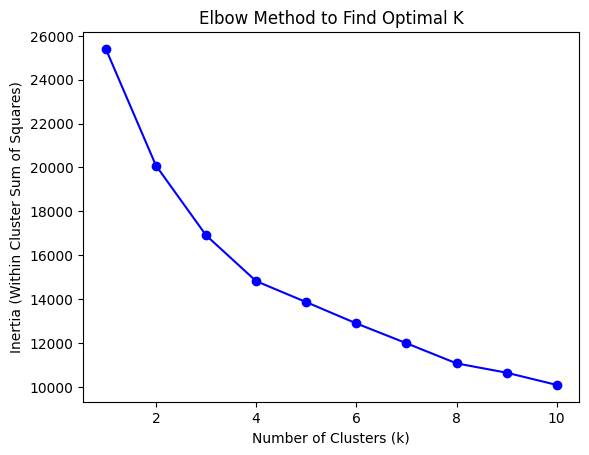

In [25]:
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [27]:
print(df['Cluster'].value_counts())
print("\nCluster Centers:\n", kmeans.cluster_centers_)

Cluster
1    1183
2     907
0     733
Name: count, dtype: int64

Cluster Centers:
 [[ 0.80842073  0.15626173  0.1599169  -0.10322049  0.13943053 -1.15351152
  -1.15675151  1.18412804  0.07164397]
 [-0.26408187  0.0398995   0.70503285  0.01560294  0.53444299  0.50961433
   0.5069744  -0.44559165  0.62315027]
 [-0.30770787 -0.1781969  -1.04941352  0.06293662 -0.81019145  0.26569688
   0.2717579  -0.3739815  -0.87128259]]
